### Write your name here
### This HW is due on  11/17 at 11:59 pm


You will be working with the movie data downloaded from here https://www.kaggle.com/karrrimba/movie-metadatacsv. Please follow the link and read more about it. This HW is little more invloved than the others. I will only tell you the main idea and what you need to do. You will have to take several baby steps doing data analysis yourself. We will grade it based on the effort, details of your work, summary, comments and finally the accuracy score of your model on the test data.

### Problem 1.  
Upload the movie data and do all the basic analysis such as finding and dealing with missing values, separating numerical and categorical variables etc.  Our goal here is to train a linear regression model. So, we are mainly interested in numerical features. Sometimes, we can turn categorical variables to different numerical levels  and actually use those categorical variables also as  features in our regression model. Please note that one of the major  factor in grading this problem is your accuracy score on a test data set so do what you can to raise it as high as you can. Find the features you want to use, treat imdb_score as a dependent variable, split the data in test and train set with appropriate rule and train a linear model.
Report the accuracy of your testing and training set. (40 points)

In [72]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib as mpt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
import scipy.stats as st
import matplotlib.colors as colors
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()  # for plot styling

movie = pd.read_csv('moviedata.csv')
movie.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [73]:
movie.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [74]:
movie1 = movie.dropna(how='any')
movie1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [75]:
movie1=movie1.replace('Color', 1)
movie1=movie1.replace(movie1.color[4962],0)
movie1

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,1,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,1,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,1,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,1,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,1,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,1,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,1,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
10,1,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


In [76]:
import statsmodels.api as sm
var1 = movie1[["color", "num_critic_for_reviews", "duration", "director_facebook_likes", "actor_3_facebook_likes", "actor_1_facebook_likes", "gross", "num_user_for_reviews", "budget", "title_year", "actor_2_facebook_likes", "aspect_ratio", "movie_facebook_likes"]]
var2 = movie1["imdb_score"]
model = sm.OLS(var2,var1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             imdb_score   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          1.409e+04
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                        0.00
Time:                        22:58:02   Log-Likelihood:                         -5045.4
No. Observations:                3756   AIC:                                  1.012e+04
Df Residuals:                    3743   BIC:                                  1.020e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
color                      -0.5273      0.086     -6.126      0.000      -0.696      -0.359
num_critic_for_reviews      0.0017      0.000      8.441      0.000       0.001       0.002
duration                    0.0132      0.001     18.160      0.000       0.012       0.015
director_facebook_likes  2.841e-05   5.13e-06      5.538      0.000    1.84e-05    3.85e-05
actor_3_facebook_likes  -3.981e-05   9.89e-06     -4.026      0.000   -5.92e-05   -2.04e-05
actor_1_facebook_likes   2.101e-06   1.07e-06      1.970      0.049    1.04e-08    4.19e-06
gross                   -2.184e-11   2.72e-10     -0.080      0.936   -5.55e-10    5.11e-10
num_user_for_reviews        0.0002   5.06e-05      4.488      0.000       0.000       0.000
budget                  -8.013e-11   6.77e-11     -1.184      0.236   -2.13e-10    5.25e-11
title_year                  0.0027   6.97e-05     39.442      0.000       0.003       0.003
actor_2_facebook_likes   2.163e-06   4.25e-06      0.509      0.611   -6.17e-06    1.05e-05
aspect_ratio               -0.1803      0.044     -4.073      0.000      -0.267      -0.094
movie_facebook_likes     2.499e-06   1.02e-06      2.461      0.014    5.08e-07    4.49e-06
==============================================================================
Omnibus:                      441.591   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              755.783
Skew:                          -0.798   Prob(JB):                    7.65e-165
Kurtosis:                       4.510   Cond. No.                     1.32e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
movie2=pd.DataFrame(var1)
x_train, x_test, y_train, y_test = train_test_split(movie2, movie1['imdb_score'], test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3004, 13) (752, 13) (3004,) (752,)


In [78]:
pred_coeffs=sm.OLS(y_train,sm.add_constant(x_train)).fit()
pred_coeffs.summary()

C:\Users\visma\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     83.71
Date:                Sun, 17 Nov 2019   Prob (F-statistic):          2.11e-190
Time:                        22:58:08   Log-Likelihood:                -3961.0
No. Observations:                3004   AIC:                             7950.
Df Residuals:                    2990   BIC:                             8034.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      60.4892      4.070     14.863      0.000      52.509      68.469
color                      -0.3979      0.096     -4.162      0.000      -0.585      -0.210
num_critic_for_reviews      0.0027      0.000     11.415      0.000       0.002       0.003
duration                    0.0106      0.001     12.484      0.000       0.009       0.012
director_facebook_likes    2.1e-05   5.78e-06      3.633      0.000    9.67e-06    3.23e-05
actor_3_facebook_likes  -4.643e-05   1.15e-05     -4.036      0.000    -6.9e-05   -2.39e-05
actor_1_facebook_likes   3.668e-06    1.6e-06      2.288      0.022    5.25e-07    6.81e-06
gross                   -3.945e-10   3.02e-10     -1.306      0.192   -9.87e-10    1.98e-10
num_user_for_reviews        0.0001   5.47e-05      1.847      0.065   -6.25e-06       0.000
budget                  -3.543e-11   6.64e-11     -0.533      0.594   -1.66e-10    9.48e-11
title_year                 -0.0276      0.002    -13.521      0.000      -0.032      -0.024
actor_2_facebook_likes   1.128e-05   5.92e-06      1.906      0.057   -3.25e-07    2.29e-05
aspect_ratio               -0.0231      0.047     -0.496      0.620      -0.114       0.068
movie_facebook_likes     3.881e-06   1.23e-06      3.158      0.002    1.47e-06    6.29e-06
==============================================================================
Omnibus:                      384.605   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              661.891
Skew:                          -0.852   Prob(JB):                    1.87e-144
Kurtosis:                       4.543   Cond. No.                     6.30e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

accuracy of the train is 28.3%

In [79]:
pred_coeffs=sm.OLS(y_test,sm.add_constant(x_test)).fit()
pred_coeffs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     32.58
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           3.94e-64
Time:                        22:58:11   Log-Likelihood:                -936.18
No. Observations:                 752   AIC:                             1900.
Df Residuals:                     738   BIC:                             1965.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      51.2831      7.643      6.710      0.000      36.278      66.288
color                      -0.2355      0.172     -1.367      0.172      -0.574       0.103
num_critic_for_reviews      0.0040      0.000      9.172      0.000       0.003       0.005
duration                    0.0108      0.001      7.886      0.000       0.008       0.013
director_facebook_likes  2.625e-05   9.59e-06      2.737      0.006    7.42e-06    4.51e-05
actor_3_facebook_likes  -1.152e-05   1.95e-05     -0.590      0.556   -4.99e-05    2.68e-05
actor_1_facebook_likes   1.602e-06   1.29e-06      1.241      0.215   -9.32e-07    4.13e-06
gross                   -7.575e-11    5.7e-10     -0.133      0.894   -1.19e-09    1.04e-09
num_user_for_reviews     4.758e-05      0.000      0.396      0.692      -0.000       0.000
budget                  -1.878e-09   6.63e-10     -2.835      0.005   -3.18e-09   -5.77e-10
title_year                 -0.0229      0.004     -5.940      0.000      -0.030      -0.015
actor_2_facebook_likes  -4.665e-06    5.5e-06     -0.848      0.396   -1.55e-05    6.13e-06
aspect_ratio               -0.2998      0.124     -2.424      0.016      -0.543      -0.057
movie_facebook_likes     1.464e-07   1.63e-06      0.090      0.928   -3.04e-06    3.34e-06
==============================================================================
Omnibus:                       93.405   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.255
Skew:                          -0.777   Prob(JB):                     4.80e-37
Kurtosis:                       4.710   Cond. No.                     2.63e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

accuracy of the test is 29.1%

### Problem 2
Using the same data as in problem 1 ( the one you get after cleaning and other preprocessing), change the column 'imdb_score' as 'imdb_labels' in the following way.

imdb_score $\geq 8$ - excellent,

$6\leq$ imdb_score $<8$ - good,

$4\leq$ imdb_score $<6$ - average,

$2\leq$ imdb_score $<4$ - mediocre,

 imdb_score $<2$ - bad,
 
By dividing the data to test and train with an appropriate rule, train 2 classifiction models using logistic and k-NN. Report testing and training accuracy scores for both models together with their confusion matrices. Which one outperforms the other and why? (40 points)

In [81]:
for index, i in movie1.iterrows():
    if (i['imdb_score'] >= 8.0):
        movie1['imdb_score'].replace(i['imdb_score'], "excellent", inplace = True)
    elif (i['imdb_score'] >= 6.0):
        movie1['imdb_score'].replace(i['imdb_score'], "good", inplace = True)
    elif (i['imdb_score'] >= 4.0):
        movie1['imdb_score'].replace(i['imdb_score'], "average", inplace = True)
    elif (i['imdb_score'] >= 2.0):
        movie1['imdb_score'].replace(i['imdb_score'], "mediocre", inplace = True)
    else:
        movie1['imdb_score'].replace(i['imdb_score'], "bad", inplace = True)

In [88]:
movie1.rename(columns={"imdb_score": "imdb_labels"})

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_labels,aspect_ratio,movie_facebook_likes
0,1,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,good,1.78,33000
1,1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,good,2.35,0
2,1,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,good,2.35,85000
3,1,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,excellent,2.35,164000
5,1,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,good,2.35,24000
6,1,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,good,2.35,0
7,1,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,good,1.85,29000
8,1,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,good,2.35,118000
9,1,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,good,2.35,10000
10,1,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,good,2.35,197000


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [114]:
y= movie1.movie_facebook_likes
x= movie1.gross

In [115]:
lrmodel = LogisticRegression(solver = 'liblinear')
lrmodel.fit(x, y)
ypredlr = lrmodel.predict(x)
print("Accuracy:",metrics.accuracy_score(y, ypredlr))

ValueError: Expected 2D array, got 1D array instead:
array=[7.60505847e+08 3.09404152e+08 2.00074175e+08 ... 4.24760000e+05
 2.04092000e+06 8.52220000e+04].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Problme 3
Use the data you get at the end of problem 1 (after preprocessing and cleaning). Remove the imdb_score column. Train  Kmeans algorithm ( no need to split in test and train) and find 5 clusters. While we tried to use clustering as a classification in our lab,  it is not usualy done so. Also, Clustering algorithm just finds clusters and we do not usually find the accuracy for this. A lot of times, the clusters it finds has nothing to do with the response variable labels.  Once you find five clusters, plot 5 clusters with 5 different colors. Please pick num_voted_users in x axis and duration in y axis.(20 points)

In [117]:
movie1.drop(['imdb_score'], axis=1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,1,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,1.78,33000
1,1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,2.35,0
2,1,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,2.35,85000
3,1,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,2.35,164000
5,1,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,2.35,24000
6,1,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,2.35,0
7,1,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,1.85,29000
8,1,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,2.35,118000
9,1,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,2.35,10000
10,1,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,2.35,197000


In [123]:
L=list(movie1.columns)[2:5]
x=movie1[L]
x.head(3)

,num_critic_for_reviews,duration,director_facebook_likes
0,723.0,178.0,0.0
1,302.0,169.0,563.0
2,602.0,148.0,0.0


In [124]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

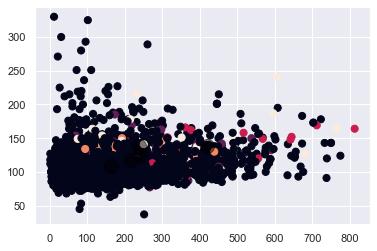

In [128]:
x=np.array(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

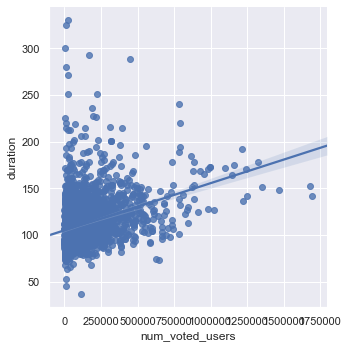

In [129]:
sns.lmplot(x='num_voted_users',y='duration', data = movie1)